In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, utils, activations, losses, optimizers, metrics
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'1.15.0'

In [3]:
# Define Parameters
num_classes = 10
img_size = 28

#### Prepare Data

In [4]:
# Load Data from Dataset function
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
# Data shape
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

(<matplotlib.image.AxesImage at 0x2a1c28e4780>, 7)

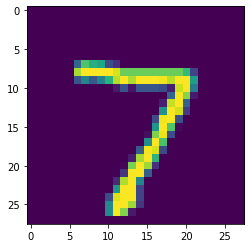

In [5]:
# Show image method 1
plt.imshow(x_test[0]), y_test[0]

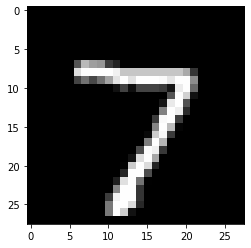

In [6]:
# Show image method 2 with grayscale color map
plt.imshow(x_test[0], cmap=plt.cm.gray)

In [7]:
# Flatten img to a vector
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# normalization to 0 ~ 1
x_train = x_train / 255.
x_test = x_test / 255.

# one hot encoding
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

In [8]:
img = x_train[0]
print(img, img.shape, y_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

#### Build Model

In [9]:
# Model 1
inputs = layers.Input(shape=(img_size*img_size,)) # input shape (784, )
x = layers.Dense(units=10, activation='relu')(inputs)
x = layers.Dense(20, activation=activations.relu)(x)
prediction = layers.Dense(num_classes, activation='softmax')(x)
model = models.Model(inputs=inputs, outputs=prediction)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
# Model 2
model2 = models.Sequential()
model2.add(layers.Dense(units=10, activation='relu', input_shape=(img_size*img_size,)))
model2.add(layers.Dense(units=20))
model2.add(layers.Activation('relu'))
model2.add(layers.Dense(num_classes, activation='softmax'))

In [11]:
# Model 3
model3 = models.Sequential([layers.Dense(units=10, activation='relu', input_shape=(img_size*img_size,)),
                            layers.Dense(units=20),
                            layers.Activation('relu'),
                            layers.Dense(num_classes, activation='softmax')
])

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 8,280
Trainable params: 8,280
Non-trainable params: 0
_________________________________________________________________


#### Training

In [13]:
# Method 1 : training from scratch
epochs = 10
batch_size = 32
# Instantiate an optimizer.
optimizer = optimizers.SGD(learning_rate=1e-3)
# Instantiate a loss function.
loss_fn = losses.CategoricalCrossentropy()

# Start training
for epoch in range(epochs):
    print(f'Epoch: {epoch}')

    for step, idx in enumerate(range(0, len(x_train), batch_size)):
        # get x, y data
        x_batch = x_train[idx:idx+batch_size]
        y_batch = y_train[idx:idx+batch_size]

        # compute loss
        with tf.GradientTape() as tape:
            pred = model(x_batch)
            loss_value = loss_fn(y_batch, pred)
        # get gradient
        grads = tape.gradient(loss_value, model.trainable_weights)
        # update model
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        if step % 200 == 0:
            print(f'step : {step} loss: {loss_value}')

Epoch: 0
step : 0 loss: Tensor("categorical_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [14]:
# Method 2

# Setting for training
model.compile(loss=losses.categorical_crossentropy, # loss function
              optimizer=optimizers.SGD(),
              metrics=['accuracy']
              )

In [15]:
logs = model.fit(x_train, y_train,
                batch_size=128,
                epochs=10,
                validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59648/60000 [============================>.] - ETA: 0s - loss: 1.8356 - acc: 0.4096

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'test loss: {score[0]}, test acc: {score[1]}')

test loss: 0.31901150941848755, test acc: 0.9086999893188477


In [22]:
prediction = model.predict(x_test[:1])
print('model prediction: ', prediction)
print('max probabolity index: ', np.argmax(prediction, axis=-1))

model prediction:  [[5.1268807e-04 7.4541977e-06 5.2556209e-04 9.9886314e-04 1.4608014e-06
  7.0902515e-06 5.3859833e-07 9.9680066e-01 9.9096233e-06 1.1356614e-03]]
max probabolity index:  [7]


In [24]:
history = logs.history

Text(0.5, 1.0, 'accuracy')

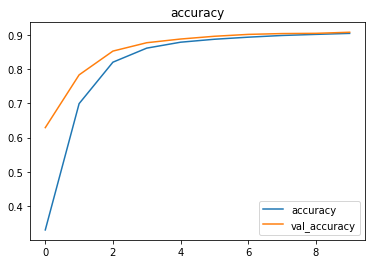

In [25]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

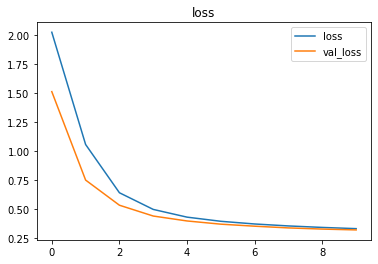

In [26]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')

#### Metrics

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
y_true = np.argmax(y_test, axis=-1) # Ground Truth
y_pred = np.argmax(model.predict(x_test), axis=-1) # Model prediction
print(y_true.shape, y_pred.shape)


(10000,) (10000,)


In [29]:
# Classification Report
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
label_names = [str(i) for i in range(10)] # ['0' ~  '9']
print(classification_report(y_true, y_pred, target_names=label_names))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       980
           1       0.96      0.97      0.97      1135
           2       0.92      0.88      0.90      1032
           3       0.87      0.91      0.89      1010
           4       0.90      0.94      0.92       982
           5       0.88      0.82      0.85       892
           6       0.93      0.93      0.93       958
           7       0.92      0.91      0.91      1028
           8       0.87      0.84      0.86       974
           9       0.90      0.88      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [30]:
# Confusion Matrix: 
# Row: Truth
# Column: Prediction
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print(confusion_matrix(y_true, y_pred))

[[ 963    0    4    1    0    5    3    3    1    0]
 [   0 1106    1    5    0    1    4    2   16    0]
 [  13   10  906   22   10    3   18   15   31    4]
 [   4    1   16  921    1   23    2   16   20    6]
 [   1    1    3    4  922    0   11    2    6   32]
 [  23    1    5   51    9  732   19    8   37    7]
 [  21    2    7    1   14   15  894    3    1    0]
 [   5    9   27    8    9    0    0  939    2   29]
 [   6   14    8   30   11   51   13    6  820   15]
 [  13    5    3   11   46    6    0   32    9  884]]


#### Save & load model

In [ ]:
prediction = model.predict(x_test[:1])
print('predictions BEFORE saving model: ', prediction)

model.save('my_model.h5')
del model

model = models.load_model('my_model.h5')
prediction = model.predict(x_test[:1])
print('prediction AFTER reloading model', prediction)

In [ ]:
# save and load weights only
model.save_weights('my_model_weights.h5')

# Rebuild model before load weights !
model.load_weights('my_model_weights.h5')